# PPG5 - Factorial ANOVA

**Objective**  
Students must analyze the impact of **Exercise Type** and **Diet Type** on **Weight** using **Python** and appropriate statistical methods. The goal is to determine if these factors, individually or in combination, significantly influence weight.  



**Dataset**  
A CSV file is provided with the following columns:  
- **SubjectID**: Identification of the subjects.  
- **Exercise**: Type of exercise performed (*categorical*).  
- **Diet**: Type of diet followed (*categorical*).  
- **Weight**: Body weight of the subjects (*quantitative, dependent*).  



**Steps to Follow**  



1. **Data Loading and Exploration:**  
   - Import the CSV file and display its contents.  
   - Identify the factors and the dependent variable.  



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('peso_ejercicio_dieta.csv')
display(df.head(5))

,SubjectID,Ejercicio,Dieta,Peso
0,S1,Aeróbico,Alta en proteínas,67.5
1,S2,Aeróbico,Alta en proteínas,68.2
2,S3,Aeróbico,Alta en proteínas,66.8
3,S4,Aeróbico,Alta en proteínas,69.0
4,S5,Aeróbico,Alta en proteínas,67.3


Como podemos observar los factores(variables independientes son ejercicio y dieta), mientras que la variable dependiente es el peso que depende de ejericio y dieta

2. **Assumption Checks:**  
   - **Normality**: Test if the **Weight** distribution follows a normal pattern.  
   - **Homogeneity of Variance**: Check if the variances among groups are homogeneous.  



In [3]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

**NORMALITY**

In [4]:
# Shapiro test(lo utilizo porque funciona bien para bases de datos pequeñas)
shapiro_test = stats.shapiro(df["Peso"])
print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic}, p-valor={shapiro_test.pvalue}")

Shapiro-Wilk Test: Estadístico=0.9427233934402466, p-valor=0.007182635832577944


Si el p-valor > 0.05, los datos siguen una distribución normal. En este caso tenemos un p-valor de 0.07, no hay suficiente evidencia de que los datos sigan una distribucion normal pero es lo mas seguro

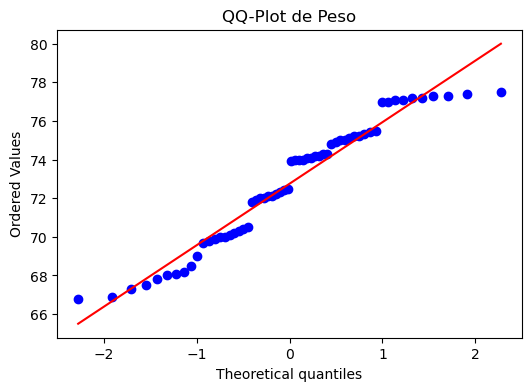

In [5]:
# QQ-Plot para visualizar normalidad
plt.figure(figsize=(6,4))
stats.probplot(df["Peso"], dist="norm", plot=plt)
plt.title("QQ-Plot de Peso")
plt.show()

En este grafico podemos observar que la distribucion no es perfectamente normal pero en el fondo si lo es.

**HOMOGENEITY OF VARIANCE**

In [6]:
# 4. Prueba de Homogeneidad de Varianza con Barlett (debido a que tenemos una distribucion de datos normal)

bartlett_test = stats.bartlett(df[df["Ejercicio"]=="Aeróbico"]["Peso"],
                               df[df["Ejercicio"]=="Anaeróbico"]["Peso"],
                               df[df["Ejercicio"]=="Combinado"]["Peso"])
print(f"Bartlett Test: Estadístico={bartlett_test.statistic}, p-valor={bartlett_test.pvalue}")

Bartlett Test: Estadístico=0.9683851501459902, p-valor=0.6161945267797464


Si el p-valor > 0.05, las varianzas son homogéneas. En este caso tenemos un p-valor de 0.061 por lo que podemos decir que las varianzas son homogeneas.

3. **Two-Way ANOVA Analysis:**  
   - Perform a **two-way ANOVA** to evaluate the effects of **Exercise** and **Diet** on **Weight**.  
   - Include the **interaction** between both factors.  



In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
# Realizar Two-Way ANOVA
modelo = smf.ols('Peso ~ C(Ejercicio) * C(Dieta)', data=df).fit()
anova_resultados = sm.stats.anova_lm(modelo, typ=2)

In [9]:
print(anova_resultados)

                           sum_sq    df            F        PR(>F)
C(Ejercicio)           526.150333   2.0  2261.751154  8.662836e-53
C(Dieta)                66.781500   1.0   574.144404  1.903490e-30
C(Ejercicio):C(Dieta)    0.237000   2.0     1.018787  3.678661e-01
Residual                 6.281000  54.0          NaN           NaN


Si p < 0.05 → El tipo de ejercicio afecta significativamente el peso. Por lo que podemos decir que el tipo de ejercicio es significativo para el peso.

Si p < 0.05 → La dieta afecta significativamente el peso. Por lo que podemos decir que la dieta es significativo para el peso.

Si p < 0.05 → Hay una interacción significativa entre ejercicio y dieta (el efecto del ejercicio cambia dependiendo de la dieta). Como este nos da 0.367 podemos decir que no hay interacción significativa entre Ejercicio y Dieta. Es decir que  los cambios de peso dependen del ejercicio y la dieta, pero no se potencian entre sí.


4. **Post-hoc Comparisons:**  
   - If ANOVA detects significant differences, conduct **post-hoc tests** (Bonferroni correction).  
   - Compare the main effects and interactions between groups.  



In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests



**POST_HOC**

In [11]:
# Comparaciones post-hoc para Ejercicio
posthoc_ejercicio = pairwise_tukeyhsd(df['Peso'], df['Ejercicio'])
print("Post-hoc Tukey para Ejercicio:")
print(posthoc_ejercicio)



Post-hoc Tukey para Ejercicio:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
  Aeróbico Anaeróbico    7.225   0.0  6.3621  8.0879   True
  Aeróbico  Combinado     4.17   0.0  3.3071  5.0329   True
Anaeróbico  Combinado   -3.055   0.0 -3.9179 -2.1921   True
-----------------------------------------------------------


En conclusion todos los tipos de ejercicio tienen efectos significativamente diferentes en el peso. El ejercicio aeróbico tiene un impacto mayor que los otros dos.

In [12]:
# Comparaciones post-hoc para Dieta
posthoc_dieta = pairwise_tukeyhsd(df['Peso'], df['Dieta'])
print("\nPost-hoc Tukey para Dieta:")
print(posthoc_dieta)



Post-hoc Tukey para Dieta:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
      group1          group2     meandiff p-adj  lower  upper  reject
---------------------------------------------------------------------
Alta en proteínas Baja en grasas     2.11 0.0092 0.5437 3.6763   True
---------------------------------------------------------------------


En conclusion las personas con una dieta alta en proteínas tienen un peso significativamente mayor en comparación con aquellas con una dieta baja en grasas.

**BONFERRONI**

In [13]:
# Ajuste de Bonferroni para Ejercicio
comparaciones_ejercicio = posthoc_ejercicio.pvalues
comparaciones_ejercicio_bonf = multipletests(comparaciones_ejercicio, method='bonferroni')[1]



In [14]:
# Ajuste de Bonferroni para Dieta
comparaciones_dieta = posthoc_dieta.pvalues
comparaciones_dieta_bonf = multipletests(comparaciones_dieta, method='bonferroni')[1]


In [15]:

print("\nP-valores ajustados con Bonferroni para Ejercicio:", comparaciones_ejercicio_bonf)
print("P-valores ajustados con Bonferroni para Dieta:", comparaciones_dieta_bonf)



P-valores ajustados con Bonferroni para Ejercicio: [0.00000000e+00 0.00000000e+00 8.53414006e-11]
P-valores ajustados con Bonferroni para Dieta: [0.00915491]


Para ejercicio: Todos los valores son extremadamente bajos (0.000000 o 8.53e-11), lo que confirma que las diferencias entre los tipos de ejercicio son altamente significativas.

Para dieta: El p-valor ajustado es 0.00915, que sigue siendo menor a 0.05, por lo que la diferencia sigue siendo significativa.


CONCLUSION FINAL:

Tanto el tipo de ejercicio como la dieta tienen un impacto significativo en el peso.

Ejercicio: El aeróbico tiene un mayor impacto en el peso que los otros dos tipos.

Dieta: La dieta alta en proteínas se asocia con un mayor peso en comparación con la baja en grasas.

Aún con la corrección de Bonferroni, los resultados siguen siendo significativos.

5. **Additional Statistical Calculations:**  
   - Compute **means and standard deviations** for each group.  
   - Calculate the **effect size (partial eta squared)** and **statistical power**.  



In [18]:
!pip install pingouin


  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/eb/56/6d3607f3a78aee1de8e5466f5171722c8e344266a12dc44ccb73d024b3b3/pingouin-0.5.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/204.4 kB ? eta -:--:--
   ---------------------------- ----------- 143.4/204.4 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 204.4/204.4 kB 3.1 MB/s eta 0:00:00


In [28]:
import numpy as np
import pingouin as pg
from pingouin import compute_effsize, power_anova  # Para calcular eta cuadrado y poder estadístico
from scipy.stats import f_oneway

**STANDARD DEVIATION**

In [20]:
# Calcular medias y desviaciones estándar para cada grupo
summary_ejercicio = df.groupby('Ejercicio')['Peso'].agg(['mean', 'std', 'count'])
summary_dieta = df.groupby('Dieta')['Peso'].agg(['mean', 'std', 'count'])

print("Resumen estadístico para Ejercicio:")
print(summary_ejercicio)

print("\nResumen estadístico para Dieta:")
print(summary_dieta)

Resumen estadístico para Ejercicio:
              mean       std  count
Ejercicio                          
Aeróbico    68.950  1.276715     20
Anaeróbico  76.175  1.078925     20
Combinado   73.120  1.031402     20

Resumen estadístico para Dieta:
                        mean       std  count
Dieta                                        
Alta en proteínas  71.693333  3.089240     30
Baja en grasas     73.803333  2.970601     30


**PARTIAL ETA SQUARED AND STATISTICAL POWER**

In [21]:
# ANOVA para obtener el tamaño del efecto (eta cuadrado parcial)
anova_ejercicio = pg.anova(dv='Peso', between='Ejercicio', data=df, detailed=True)
anova_dieta = pg.anova(dv='Peso', between='Dieta', data=df, detailed=True)

# Extraer eta cuadrado parcial
eta_squared_ejercicio = anova_ejercicio['np2'][0]
eta_squared_dieta = anova_dieta['np2'][0]

print("\nTamaño del efecto (eta cuadrado parcial) para Ejercicio:", eta_squared_ejercicio)
print("Tamaño del efecto (eta cuadrado parcial) para Dieta:", eta_squared_dieta)


Tamaño del efecto (eta cuadrado parcial) para Ejercicio: 0.8777220445747613
Tamaño del efecto (eta cuadrado parcial) para Dieta: 0.11140465187662213


In [30]:
from statsmodels.stats.power import FTestAnovaPower

In [31]:
# Calcular Cohen's f a partir de eta cuadrado parcial
def eta_squared_to_cohen_f(eta_squared):
    return np.sqrt(eta_squared / (1 - eta_squared))

f_ejercicio = eta_squared_to_cohen_f(eta_squared_ejercicio)
f_dieta = eta_squared_to_cohen_f(eta_squared_dieta)

In [32]:
# Inicializar el análisis de potencia
anova_power = FTestAnovaPower()

# Calcular potencia estadística
power_ejercicio = anova_power.solve_power(effect_size=f_ejercicio, nobs=df.shape[0], alpha=0.05, k_groups=df['Ejercicio'].nunique())
power_dieta = anova_power.solve_power(effect_size=f_dieta, nobs=df.shape[0], alpha=0.05, k_groups=df['Dieta'].nunique())

print("\nPotencia estadística para Ejercicio:", power_ejercicio)
print("Potencia estadística para Dieta:", power_dieta)


Potencia estadística para Ejercicio: 1.0
Potencia estadística para Dieta: 0.769457857886378


6. **Results Visualization:**  
   - Generate **boxplots** to visualize weight distribution across groups.  
   - Create an **interaction plot** for **Exercise** and **Diet**.  



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

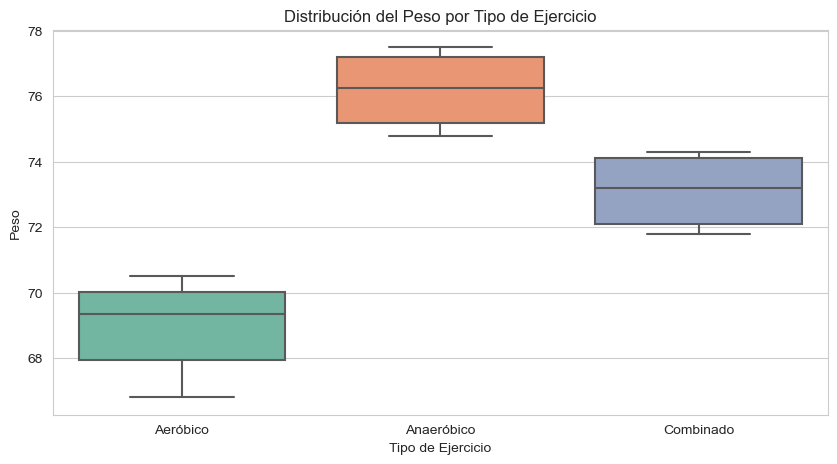

In [34]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")

# Boxplot para Ejercicio
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ejercicio', y='Peso', data=df, palette="Set2")
plt.title("Distribución del Peso por Tipo de Ejercicio")
plt.xlabel("Tipo de Ejercicio")
plt.ylabel("Peso")
plt.show()

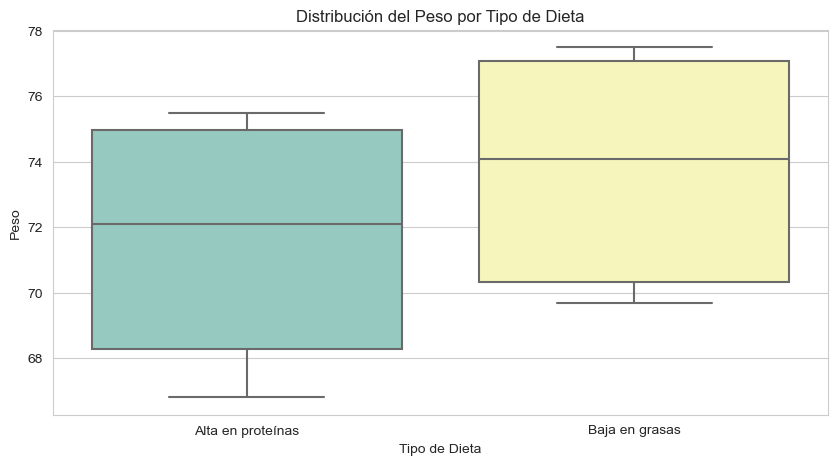

In [38]:
# Boxplot para Dieta
plt.figure(figsize=(10, 5))
sns.boxplot(x='Dieta', y='Peso', data=df, palette="Set3")
plt.title("Distribución del Peso por Tipo de Dieta")
plt.xlabel("Tipo de Dieta")
plt.ylabel("Peso")
plt.show()



<Figure size 1000x500 with 0 Axes>

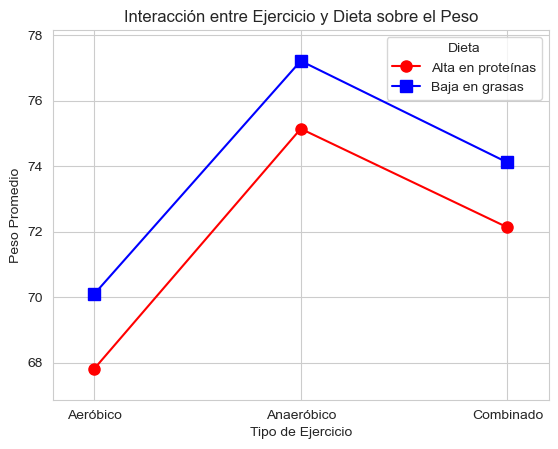

In [40]:
# Contar cuántas categorías tiene 'Dieta'
num_dietas = df['Dieta'].nunique()

# Definir colores y marcadores dinámicamente según la cantidad de grupos
colores = ['red', 'blue', 'green', 'purple', 'orange'][:num_dietas]  # Ajuste dinámico
marcadores = ['o', 's', 'D', '^', 'v'][:num_dietas]  # Ajuste dinámico

# Crear gráfico de interacción
plt.figure(figsize=(10, 5))
interaction_plot(df['Ejercicio'], df['Dieta'], df['Peso'], colors=colores, markers=marcadores, ms=8)

plt.title("Interacción entre Ejercicio y Dieta sobre el Peso")
plt.xlabel("Tipo de Ejercicio")
plt.ylabel("Peso Promedio")
plt.show()

7. **Interpretation and Conclusions:**  
   - Explain which factors significantly affect **Weight**.  
   - Analyze whether there are meaningful interactions between **Exercise** and **Diet**.  
   - Discuss the study's implications based on the obtained results.  



**Implementation Requirements**  
- Use **Python** for the entire analysis.  
- Use the mathematical theory to compute the results.
- Last, apply libraries such as **pandas, scipy, statsmodels, and plotly** to perform the statistical tests and visualizations.  



**Submission Requirements**  
Each student must submit:  
- Well-documented **Python code**.  
- A **statistical analysis** with result interpretation.  
- **Graphs** supporting the conclusions.  
- Upload your file to GitHub your repository, make a commit and push.